In [ ]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [ ]:
from keras.utils import pad_sequences

padded_inputs = pad_sequences(x_train, maxlen=200, value = 0.0) # 0.0 because it corresponds with <PAD>
padded_inputs_test = pad_sequences(x_test, maxlen=200, value = 0.0) # 0.0 because it corresponds with <PAD>

In [ ]:
import numpy as np

# Obtain 3 texts
for i in np.random.randint(0, len(padded_inputs), 3):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(padded_inputs[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in padded_inputs[i] ))

1641221/1641221 [==============================] - 1s 0us/step
Sample = 5079 | Length = 200
rogers sings the catchy let yourself go and later does a solo tap dance to the same tune br br the three <UNK> really save the film even though they're all <UNK> into the plot with silly excuses fred and ginger win a dance contest by doing an energetic routine to another <UNK> of let yourself go later they sing and dance i'm putting all my eggs in one basket as if it were an early rehearsal of the number <UNK> the choreography to comic effect at the end the movie finally figures out how to get fred and ginger in evening clothes for a romantic <UNK> it makes it part of a show within the show the situation is contrived but the song let's face the music and dance is one of the most <UNK> beautiful things berlin ever wrote it's reminiscent of cole porter and the dancing matches it in <UNK> quintessential astaire and rogers br br it would be a chore to sit through most of the dialogue sections of fol

In [ ]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
from keras import regularizers

model = models.Sequential()
model.add(Embedding(10000, 15, input_length=200))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L1(l1=0.0001)))
# model.add(Dense(128, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L1(l1=0.0001)))
# model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 15)           150000    
                                                                 
 flatten_2 (Flatten)         (None, 3000)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               384128    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 542,449
Trainable params: 542,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NumEpochs = 20
BatchSize = 512

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(padded_inputs, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(padded_inputs_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 57ms/step - loss: 0.6096 - acc: 0.7888 - val_loss: 0.4791 - val_acc: 0.8480
Epoch 2/20
49/49 [==============================] - 3s 55ms/step - loss: 0.3797 - acc: 0.8979 - val_loss: 0.4219 - val_acc: 0.8648
Epoch 3/20
49/49 [==============================] - 3s 68ms/step - loss: 0.2789 - acc: 0.9454 - val_loss: 0.4271 - val_acc: 0.8642
Epoch 4/20
49/49 [==============================] - 3s 64ms/step - loss: 0.2081 - acc: 0.9743 - val_loss: 0.4428 - val_acc: 0.8640
Epoch 5/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1527 - acc: 0.9925 - val_loss: 0.4601 - val_acc: 0.8600
Epoch 6/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1213 - acc: 0.9975 - val_loss: 0.4747 - val_acc: 0.8572
Epoch 7/20
49/49 [==============================] - 3s 54ms/step - loss: 0.1020 - acc: 0.9994 - val_loss: 0.4829 - val_acc: 0.8534
Epoch 8/20
49/49 [==============================] - 4s 78ms/step - loss: 0.0896 - a

In [ ]:
results = model.evaluate(padded_inputs_test, y_test)
print("results ", results[1])

782/782 [==============================] - 2s 3ms/step - loss: 0.5276 - acc: 0.8413
results  0.8412799835205078


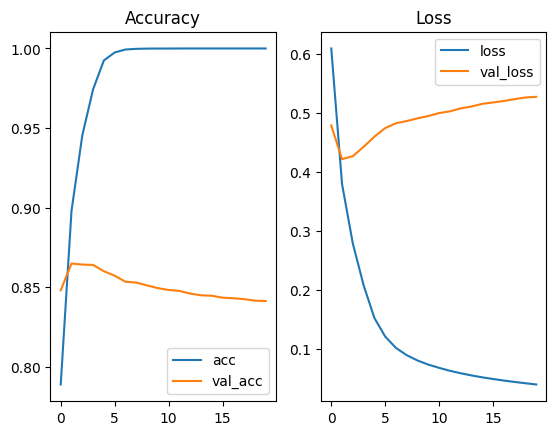

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2)

axis[0].plot(range(len(history.history['acc'])), history.history['acc'], label='acc')
axis[0].plot(range(len(history.history['val_acc'])), history.history['val_acc'], label='val_acc')
axis[0].set_title("Accuracy")
axis[0].legend()

axis[1].plot(range(len(history.history['loss'])), history.history['loss'], label='loss')
axis[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='val_loss')
axis[1].set_title("Loss")
axis[1].legend()

plt.show()